In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,OrdinalEncoder

import folium
import plotly.express as px

# Exploracion Inicial y Limpieza de Datos 

In [62]:
df_bmw=pd.read_csv("bmw_pricing_v3.csv")
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [63]:
df_bmw.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4841.0,140959.347862,60208.534313,-64.0,102884.0,141080.0,175217.0,1000376.0
potencia,4842.0,128.981826,38.994839,0.0,100.0,120.0,135.0,423.0
precio,4837.0,15831.920612,9222.630708,100.0,10800.0,14200.0,18600.0,178500.0


In [64]:
df_bmw.describe(include=['object']).T

,count,unique,top,freq
marca,3873,1,BMW,3873
modelo,4840,76,320,752
fecha_registro,2420,180,2013-07-01,93
tipo_gasolina,4838,5,diesel,4631
color,4398,10,black,1499
tipo_coche,3383,8,estate,1107
volante_regulable,4839,2,True,2662
aire_acondicionado,4357,2,True,3465
camara_trasera,4841,2,False,3864
asientos_traseros_plegables,1452,2,False,1150


In [65]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [66]:
# Comprobamos si hay duplicados en el dataset.
df_bmw[df_bmw.duplicated()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [67]:
# Reemplazamos los valores nulos por BMW.
df_bmw["marca"].fillna("BMW", inplace=True)

df_bmw['marca'].value_counts()

marca
BMW    4843
Name: count, dtype: int64

In [68]:
# Eliminamos los valores nulos de la columna de modelo.
df_bmw = df_bmw.dropna(subset='modelo')

df_bmw['modelo'].isnull().sum()


0

In [69]:
# Agrupamos en una nueva columna las dos columnas de marca y de modelo.
df_bmw['marca_modelo'] = df_bmw['marca'] + ' ' + df_bmw['modelo']

In [70]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,marca_modelo
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,BMW 118
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,BMW M4
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,BMW 320
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,BMW 420
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,BMW 425


In [71]:
# Vamos a eliminar estas columnas ya que algunas tienen demasiados valores nulos y otras no consideramos como relevantes.
columnas_a_eliminar = ['fecha_venta', 'modelo', 'marca','fecha_registro','asientos_traseros_plegables']

for columna in columnas_a_eliminar:
    if columna in df_bmw.columns:
        df_bmw.drop(columna, axis=1, inplace=True)

df_bmw.head() 

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,marca_modelo
0,140411.0,100.0,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,BMW 118
1,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,BMW M4
2,183297.0,120.0,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,BMW 320
3,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,BMW 420
4,97097.0,160.0,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,BMW 425


In [72]:
# Filtamos estas columnas para dejar solo los valores sin nulos. Guardamos los cambios en un nuevo dataset. 
columnas_a_limpiar = ['km','potencia','tipo_gasolina','volante_regulable','camara_trasera','elevalunas_electrico','precio']
df2_bmw = df_bmw.dropna(subset=columnas_a_limpiar)

df2_bmw.isnull().sum()

km                         0
potencia                   0
tipo_gasolina              0
color                    442
tipo_coche              1450
volante_regulable          0
aire_acondicionado       482
camara_trasera             0
elevalunas_electrico       0
bluetooth                725
gps                        0
alerta_lim_velocidad     725
precio                     0
marca_modelo               0
dtype: int64

In [73]:
df3_bmw = df2_bmw.copy()

<Axes: >

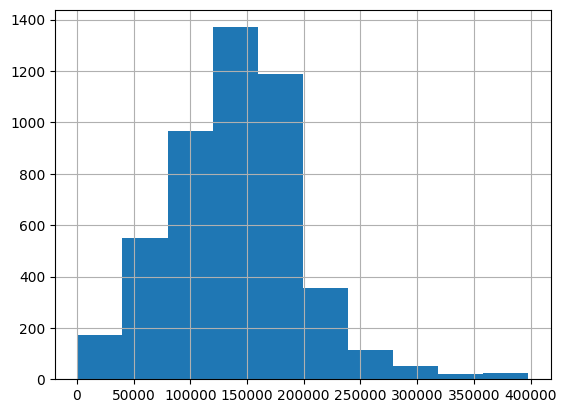

In [74]:
# Quitamos los outliers de la columna 'km'. 
df3_bmw.drop(df3_bmw[((df3_bmw["km"]<0) | (df3_bmw["km"]>400000))].index, inplace=True)

df3_bmw['km'].hist()

In [75]:
df4_bmw = df3_bmw.copy()

<Axes: >

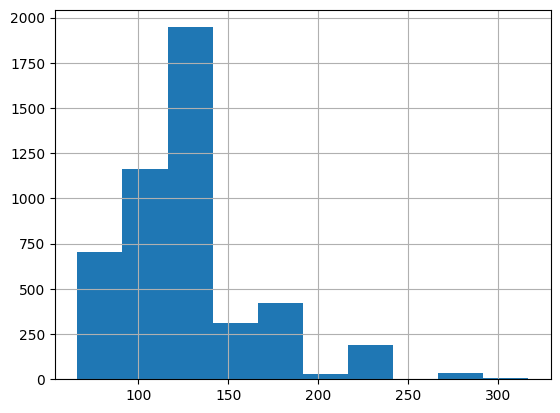

In [76]:
# Quitamos los outliers de la columna 'potencia'. 
df4_bmw.drop(df4_bmw[((df4_bmw["potencia"]<=50) | (df4_bmw["potencia"]>=400))].index, inplace=True)

df4_bmw['potencia'].hist()

<Axes: >

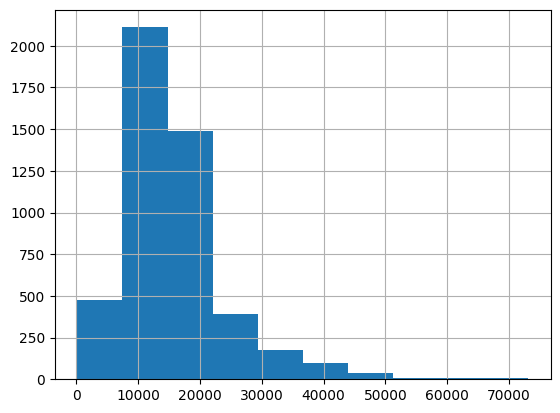

In [77]:
# Quitamos los outliers de la columna 'precio'. 
df4_bmw.drop(df4_bmw[((df4_bmw["precio"]<=100) | (df4_bmw["precio"]>=75000))].index, inplace=True)

df4_bmw['precio'].hist()

In [78]:
# Cambiamos los valores nulos de las columnas de color y tipo coche, por 'sin especificar'.
df4_bmw["color"].fillna("sin especificar", inplace=True)
df4_bmw["tipo_coche"].fillna('sin especificar', inplace=True)

df4_bmw.isnull().sum()

km                        0
potencia                  0
tipo_gasolina             0
color                     0
tipo_coche                0
volante_regulable         0
aire_acondicionado      481
camara_trasera            0
elevalunas_electrico      0
bluetooth               721
gps                       0
alerta_lim_velocidad    721
precio                    0
marca_modelo              0
dtype: int64

In [79]:
df5_bmw = df4_bmw.copy()

In [80]:
# Guardamos el dataframe en un pickle para así poder seguir el día siguiente sin tener que ejecutar todo. 
pd.to_pickle(df5_bmw,"C:/Users/mitev/Desktop/Simeon/NUCLIO DIGITAL SCHOOL/Entregables/Primer entregable/practica_entregable_Simeon_Mitev_PK")

In [81]:
# Ejecutamos el pickle y creamos una nueva variable. 
df_bmw_rec=pd.read_pickle("practica_entregable_Simeon_Mitev_PK")

# 2ª parte con la Limpieza de Datos 

In [82]:
# Obtener la frecuencia de cada valor en la columna
frecuencia_valores = df_bmw_rec['marca_modelo'].value_counts()

# Seleccionar los valores que aparecen solo una vez
valores_a_eliminar = frecuencia_valores[frecuencia_valores <= 3].index.tolist()

# Filtrar el DataFrame para eliminar las filas que contienen esos valores únicos
df_bmw_rec = df_bmw_rec[~df_bmw_rec['marca_modelo'].isin(valores_a_eliminar)]

df_bmw_rec['marca_modelo'].value_counts()

marca_modelo
BMW 320                  743
BMW 520                  629
BMW 318                  560
BMW X3                   435
BMW 116                  357
BMW X1                   273
BMW 316                  233
BMW X5                   231
BMW 525                  182
BMW 530                  157
BMW 118                  142
BMW 318 Gran Turismo      97
BMW 320 Gran Turismo      73
BMW 518                   66
BMW X4                    45
BMW 535                   45
BMW X6                    44
BMW 420                   42
BMW 120                   36
BMW 330                   33
BMW 730                   33
BMW 420 Gran Coupé        33
BMW 520 Gran Turismo      23
BMW 325                   19
BMW 530 Gran Turismo      18
BMW 740                   18
BMW 640 Gran Coupé        18
BMW X5 M                  17
BMW 114                   15
BMW 218 Active Tourer     13
BMW M550                  12
BMW 218                   12
BMW 218 Gran Tourer        9
BMW 418 Gran Coupé         8
B

In [83]:
# Sustituyo los valores nulos de estas columnas por su mediana.
df_bmw_rec["aire_acondicionado"].fillna(df_bmw_rec["aire_acondicionado"].median(),inplace=True)
df_bmw_rec["bluetooth"].fillna(df_bmw_rec["bluetooth"].median(),inplace=True)
df_bmw_rec["alerta_lim_velocidad"].fillna(df_bmw_rec["alerta_lim_velocidad"].median(),inplace=True)


In [84]:
columnas_a_convertir = ['volante_regulable', 'aire_acondicionado', 'camara_trasera','elevalunas_electrico','bluetooth','gps','alerta_lim_velocidad']

for col in columnas_a_convertir:
    df_bmw_rec[col] = df_bmw_rec[col].astype('int64')
    
df_bmw_rec.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,marca_modelo
0,140411.0,100.0,diesel,black,sin especificar,1,1,0,1,0,1,1,11300.0,BMW 118
2,183297.0,120.0,diesel,white,sin especificar,0,0,0,1,0,1,0,10200.0,BMW 320
3,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,25100.0,BMW 420
5,152352.0,225.0,petrol,black,sin especificar,1,1,0,1,1,1,1,17100.0,BMW 335
6,205219.0,145.0,diesel,grey,convertible,1,1,0,1,1,1,1,12400.0,BMW 325


In [85]:
df_bmw_rec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4755 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4755 non-null   float64
 1   potencia              4755 non-null   float64
 2   tipo_gasolina         4755 non-null   object 
 3   color                 4755 non-null   object 
 4   tipo_coche            4755 non-null   object 
 5   volante_regulable     4755 non-null   int64  
 6   aire_acondicionado    4755 non-null   int64  
 7   camara_trasera        4755 non-null   int64  
 8   elevalunas_electrico  4755 non-null   int64  
 9   bluetooth             4755 non-null   int64  
 10  gps                   4755 non-null   int64  
 11  alerta_lim_velocidad  4755 non-null   int64  
 12  precio                4755 non-null   float64
 13  marca_modelo          4755 non-null   object 
dtypes: float64(3), int64(7), object(4)
memory usage: 557.2+ KB


In [86]:
df_bmw_rec['tipo_gasolina'] = df_bmw_rec['tipo_gasolina'].str.lower()
df_bmw_rec['tipo_gasolina'].value_counts()

tipo_gasolina
diesel           4572
petrol            176
hybrid_petrol       4
electro             3
Name: count, dtype: int64

In [87]:
columnas_y_valores = {
    'tipo_gasolina': ['hybrid_petrol', 'electro'],
    'color': ['orange', 'green', 'beige','red'],
    'tipo_coche':['van', 'convertible', 'coupe','subcompact']
    
}

In [88]:
for columna,valores_a_eliminar in columnas_y_valores.items():
    df_bmw_rec[columna].replace(valores_a_eliminar, inplace=True, value=np.nan)

In [89]:
# Filtamos estas columnas para dejar solo los valores sin nulos. Guardamos los cambios en el dataset. 
columnas_a_limpiar2 = ['tipo_gasolina','color','tipo_coche']
df_bmw_rec = df_bmw_rec.dropna(subset=columnas_a_limpiar2)

df_bmw_rec.isnull().sum()

km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
marca_modelo            0
dtype: int64

In [90]:
df_bmw_rec.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,marca_modelo
0,140411.0,100.0,diesel,black,sin especificar,1,1,0,1,0,1,1,11300.0,BMW 118
2,183297.0,120.0,diesel,white,sin especificar,0,0,0,1,0,1,0,10200.0,BMW 320
5,152352.0,225.0,petrol,black,sin especificar,1,1,0,1,1,1,1,17100.0,BMW 335
11,228000.0,145.0,diesel,black,sin especificar,1,1,0,1,0,1,1,13300.0,BMW 325
12,132025.0,135.0,diesel,blue,sin especificar,1,1,0,1,1,1,1,21700.0,BMW 420


# Analisis Univariable y Correlación Inicial 

In [91]:
# PRIMERA VISUALIZACIÓN DE CORRELACIONES ENTRE COLUMNAS 
corr = df_bmw_rec.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio
km,1.000000,-0.032146,0.070873,0.029923,0.004944,0.056138,-0.027951,0.170083,-0.030700,-0.426015
potencia,-0.032146,1.000000,0.322185,0.184856,0.317605,0.343101,0.189559,0.007694,0.431285,0.674865
volante_regulable,0.070873,0.322185,1.000000,0.286297,0.254473,0.268077,0.113828,0.247558,0.183665,0.285815
aire_acondicionado,0.029923,0.184856,0.286297,1.000000,0.140538,0.262392,0.105569,0.357805,0.159003,0.238836
camara_trasera,0.004944,0.317605,0.254473,0.140538,1.000000,0.197510,0.122841,0.063005,0.170064,0.265771
elevalunas_electrico,0.056138,0.343101,0.268077,0.262392,0.197510,1.000000,0.233151,0.201036,0.296087,0.281208
bluetooth,-0.027951,0.189559,0.113828,0.105569,0.122841,0.233151,1.000000,0.114200,0.072903,0.191959
gps,0.170083,0.007694,0.247558,0.357805,0.063005,0.201036,0.114200,1.000000,-0.056792,0.005952
alerta_lim_velocidad,-0.030700,0.431285,0.183665,0.159003,0.170064,0.296087,0.072903,-0.056792,1.000000,0.403641
precio,-0.426015,0.674865,0.285815,0.238836,0.265771,0.281208,0.191959,0.005952,0.403641,1.000000


# ANÁLISIS DE VARIABLE VS TARGET

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 tipo_gasolina
diesel    4326
petrol     139
Name: count, dtype: int64 

color 
 color
black              1420
grey               1005
blue                601
white               448
sin especificar     419
brown               298
silver              274
Name: count, dtype: int64 

tipo_coche 
 tipo_coche
sin especificar    1397
estate             1078
sedan               797
suv                 726
hatchback           467
Name: count, dtype: int64 

[[<Axes: title={'center': 'volante_regulable'}>]]
[[<Axes: title={'center': 'aire_acondicionado'}>]]
[[<Axes: title={'center': 'camara_trasera'}>]]
[[<Axes: title={'center': 'elevalunas_electrico'}>]]
[[<Axes: title={'center': 'bluetooth'}>]]
[[<Axes: title={'center': 'gps'}>]]
[[<Axes: title={'center': 'alerta_lim_velocidad'}>]]
[[<Axes: title={'center': 'precio'}>]]
marca_modelo 
 marca_modelo
BMW 320                  713
BMW 520                  6

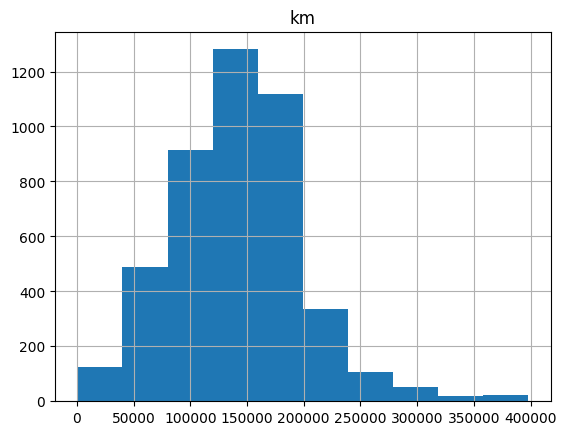

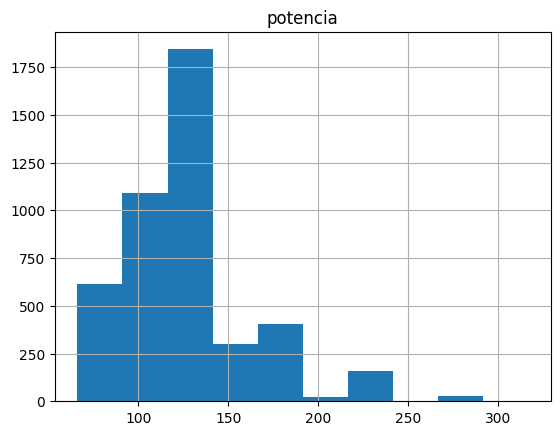

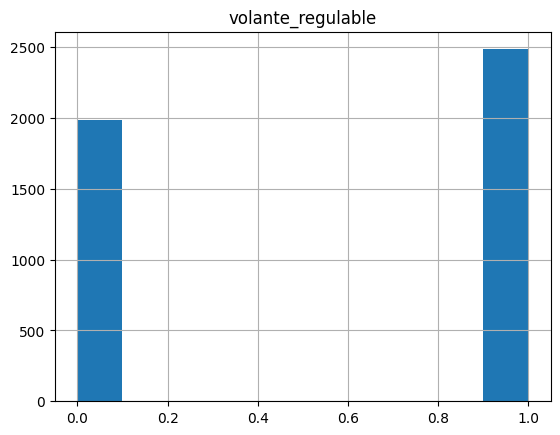

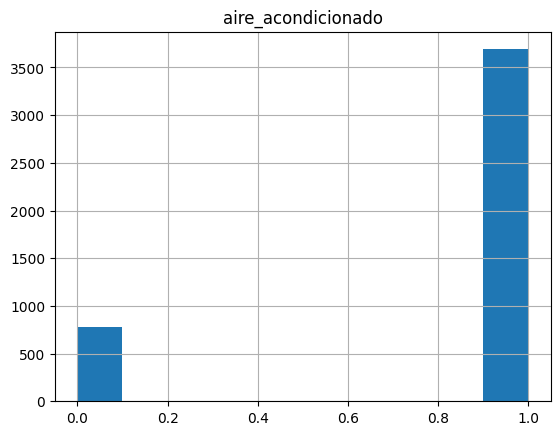

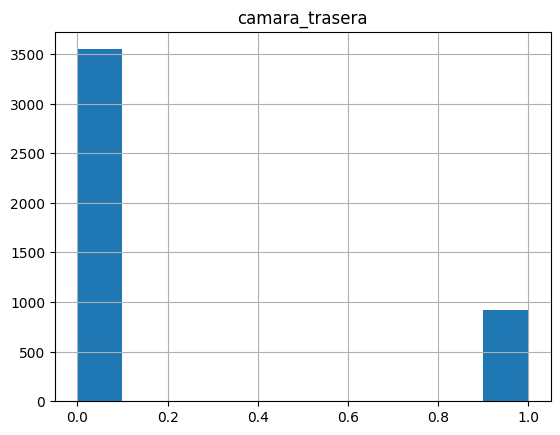

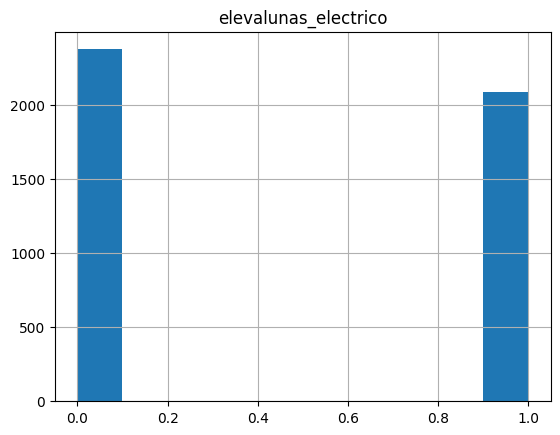

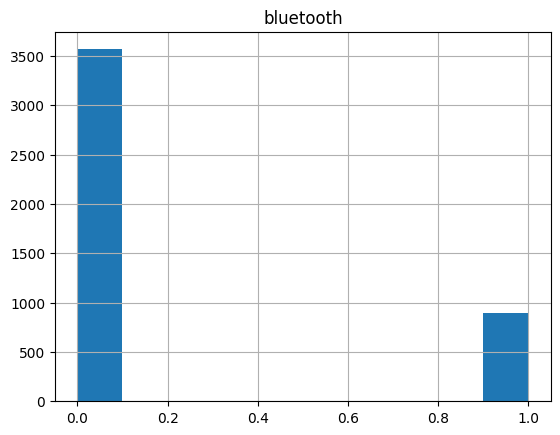

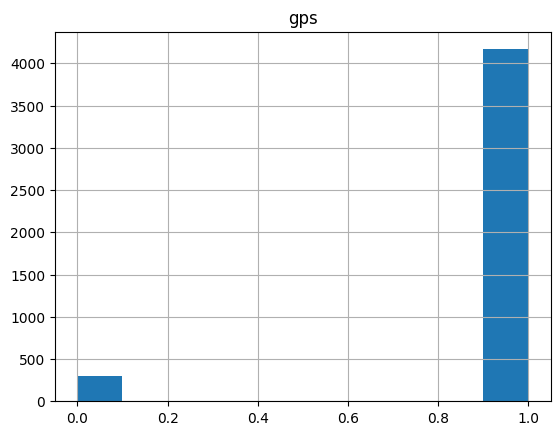

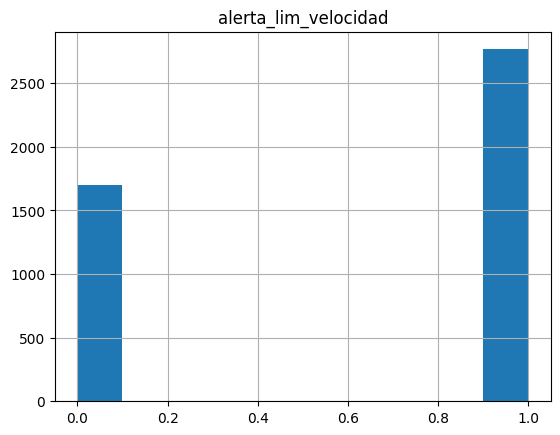

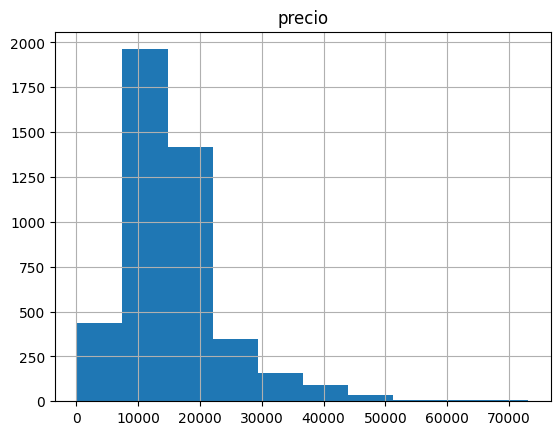

In [92]:
# Bucle para ver en general las columnas. 
for i in df_bmw_rec:
  if (df_bmw_rec[i].dtype.kind == "O") or (df_bmw_rec[i].dtype.kind == "B"):
    print(i,'\n', df_bmw_rec[i].value_counts(), '\n')
  elif (df_bmw_rec[i].dtype.kind=="f") or (df_bmw_rec[i].dtype.kind=="i"):
    print(df_bmw_rec.hist(i))

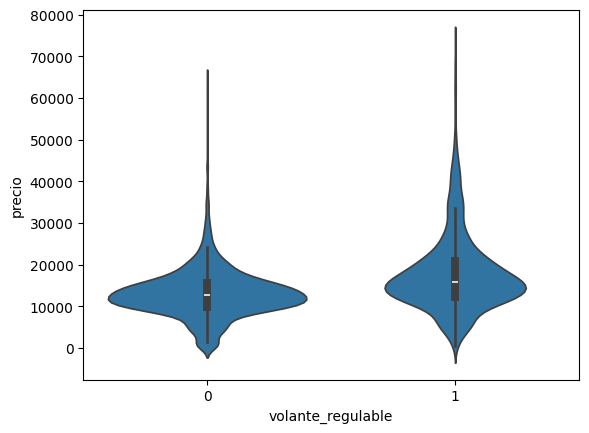

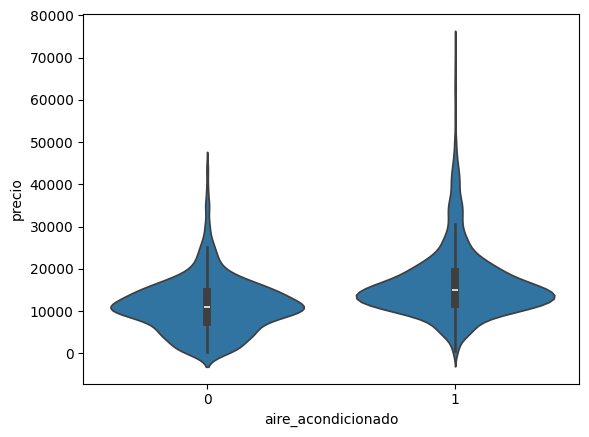

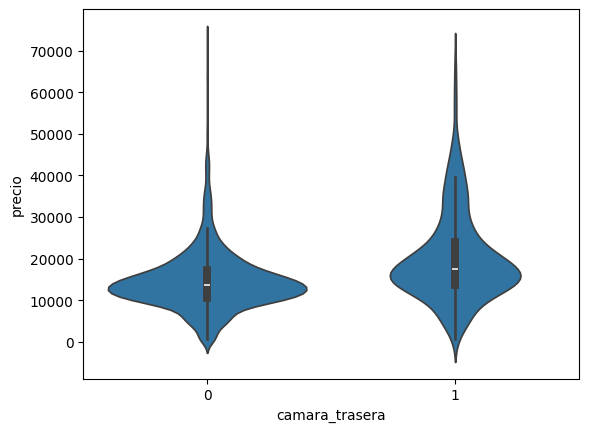

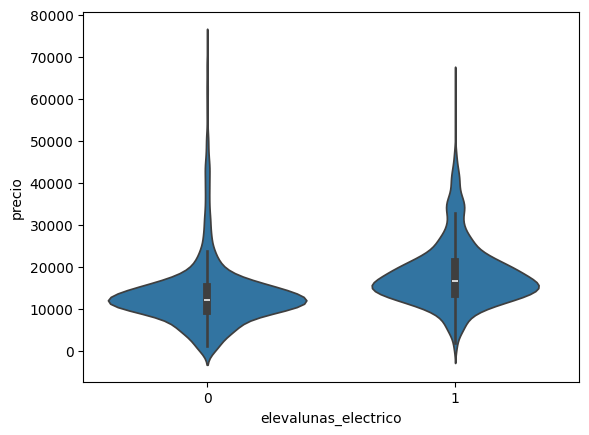

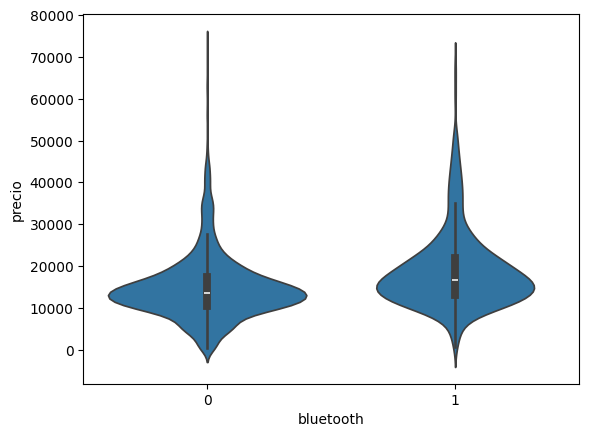

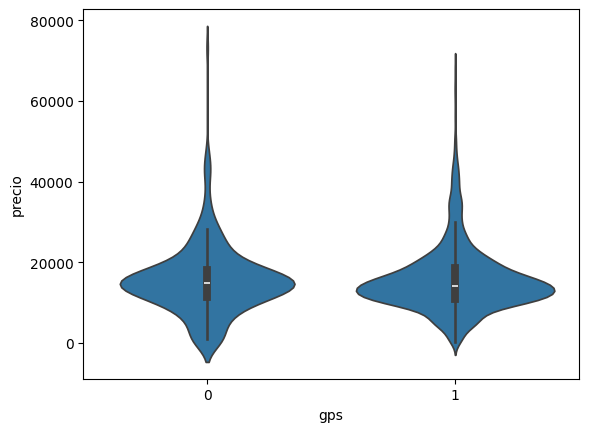

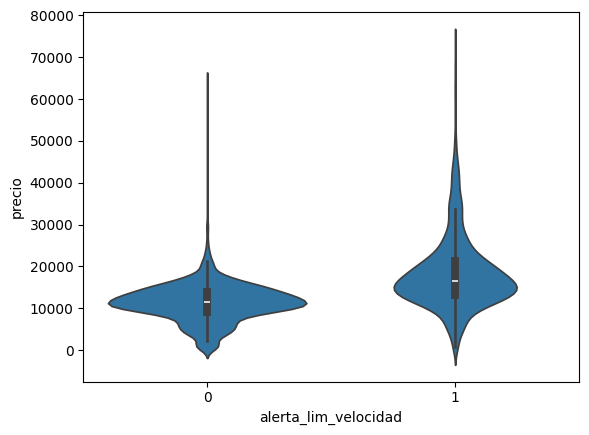

In [93]:
for i in df_bmw_rec:
  if (df_bmw_rec[i].dtype.kind =="i"):
    plt.figure()
    sns.violinplot(x=i,y="precio", data=df_bmw_rec)    

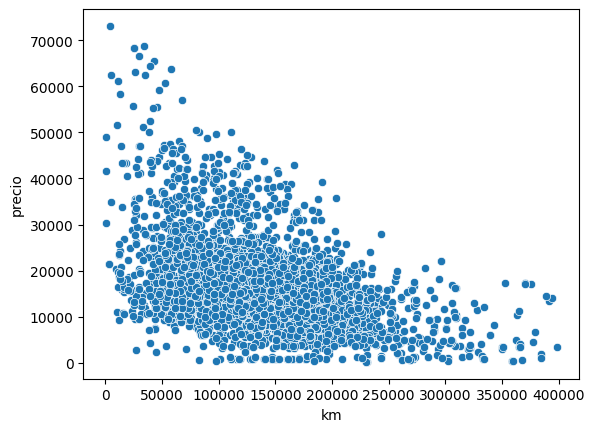

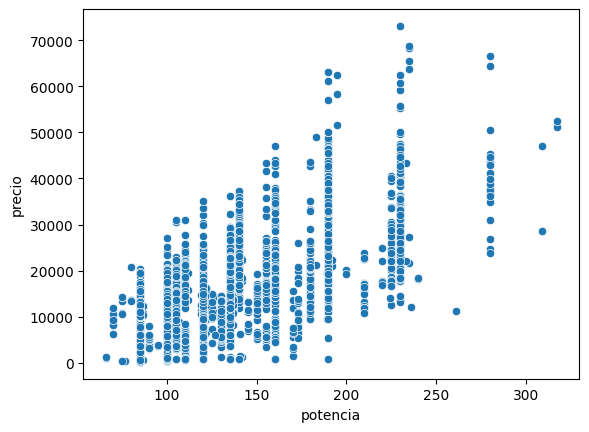

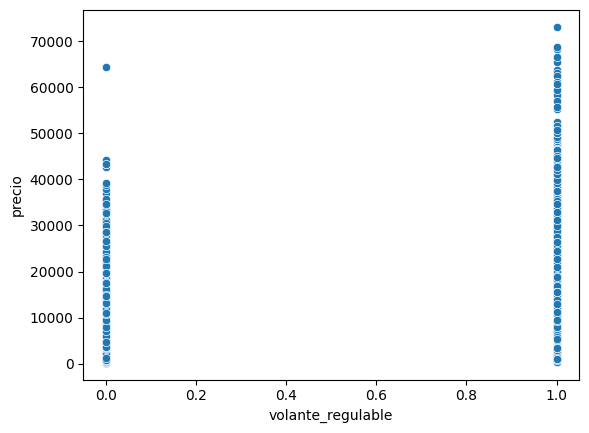

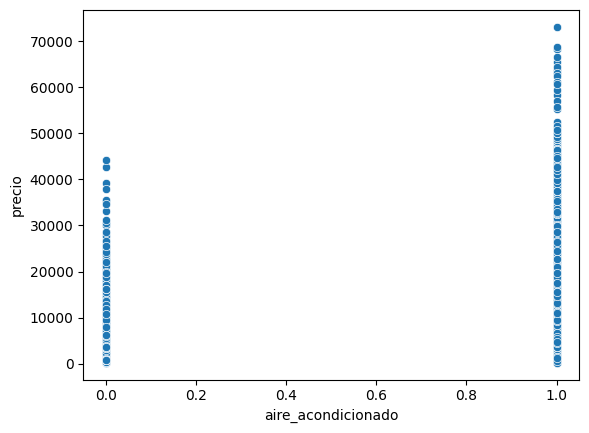

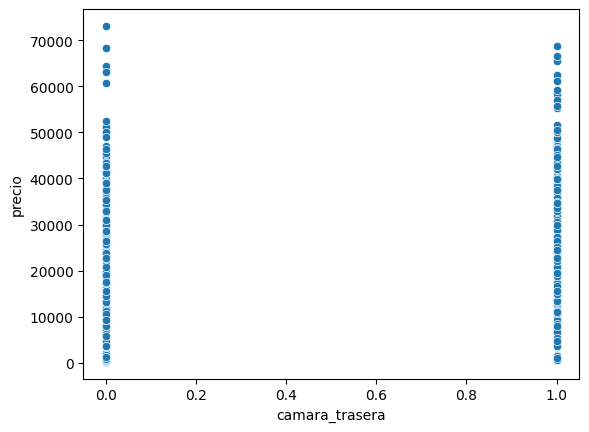

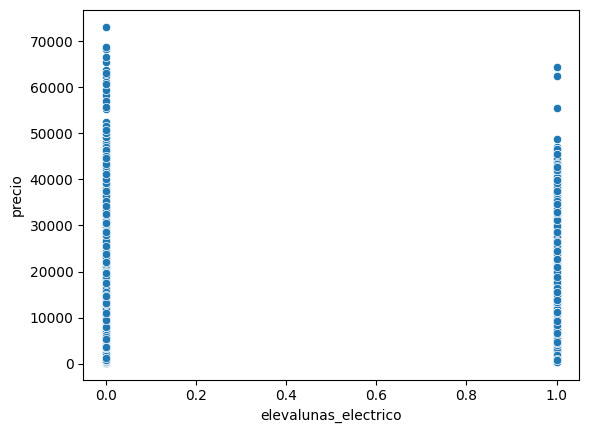

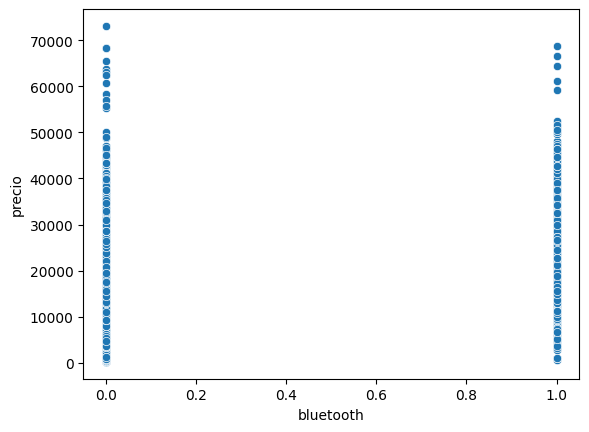

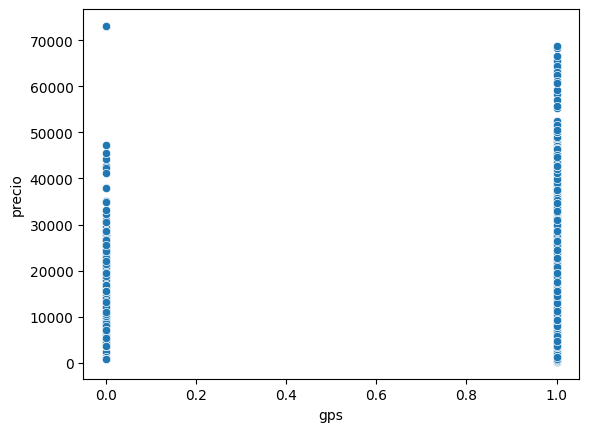

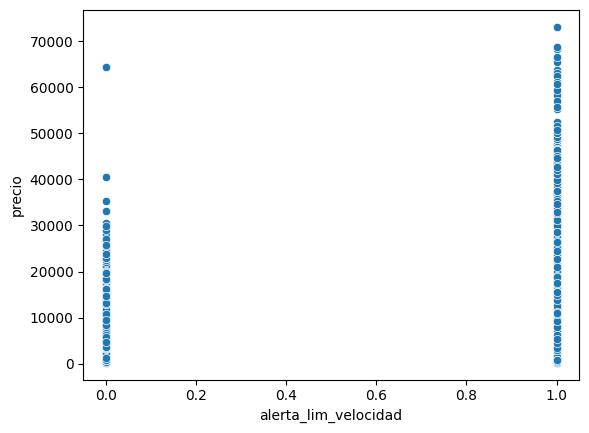

In [94]:
for i in df_bmw_rec:
  if (df_bmw_rec[i].dtype.kind in ("i","f")) and (i!="precio"):
    plt.figure()
    sns.scatterplot(x=i,y="precio", data=df_bmw_rec)   

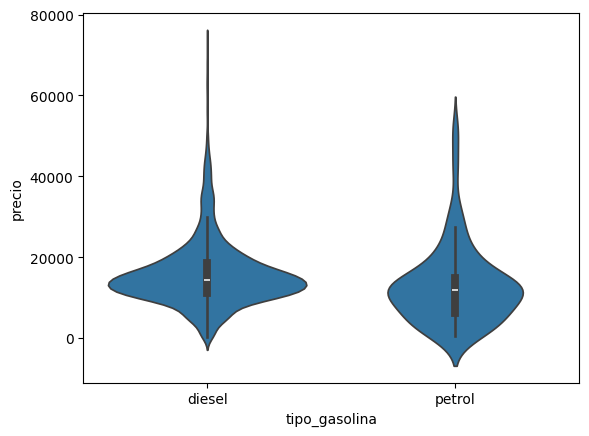

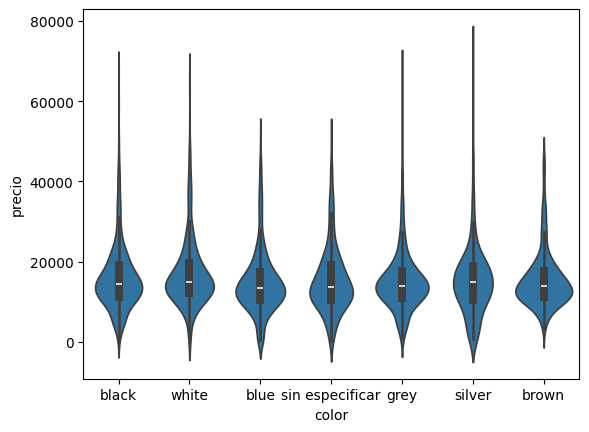

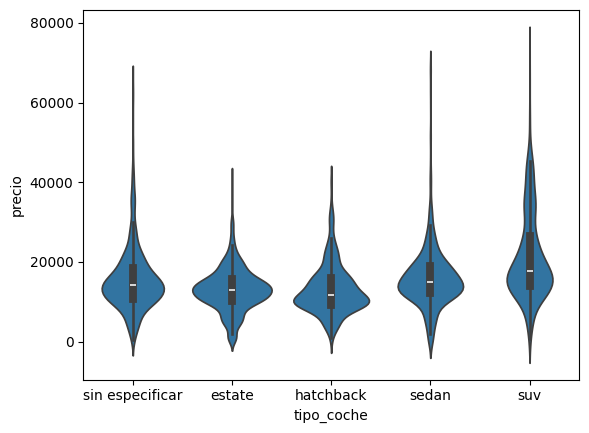

In [95]:
for i in df_bmw_rec:
  if (df_bmw_rec[i].dtype.kind =="O") and (i!="marca_modelo"):
    plt.figure()
    sns.violinplot(x=i,y="precio", data=df_bmw_rec)   

<Axes: xlabel='precio'>

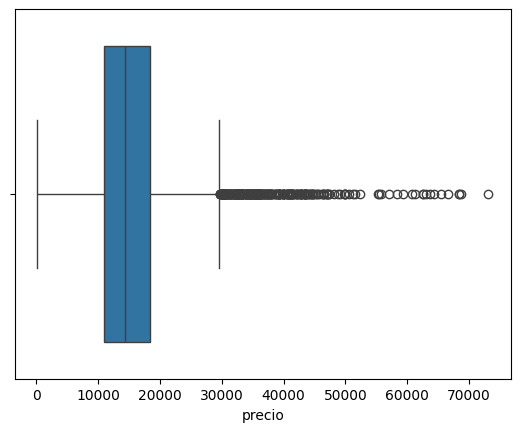

In [96]:
sns.boxplot(x=df_bmw_rec["precio"])

<Axes: xlabel='LOG_PRECIO'>

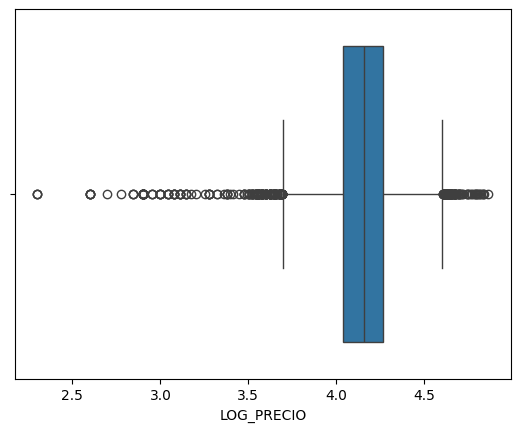

In [97]:
# Creamos una nueva columna llamada LOG Precio.
df_bmw_rec["LOG_PRECIO"]=np.log10(df_bmw_rec["precio"])
sns.boxplot(x=df_bmw_rec["LOG_PRECIO"])

array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

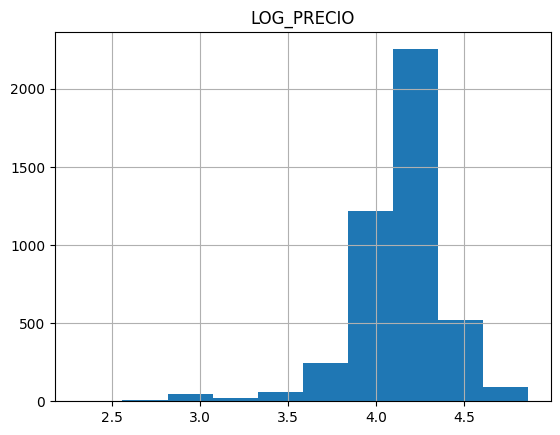

In [98]:
df_bmw_rec.hist("LOG_PRECIO")

<Axes: xlabel='RAIZ_PRECIO'>

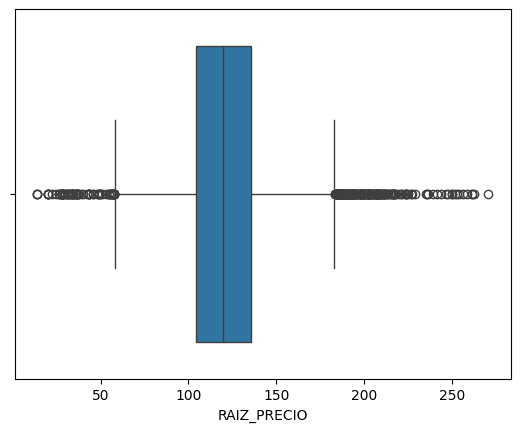

In [99]:
# Creamos una nueva columna llamada Raiz Precio para ayudar a reducir el sezgo y mejorar la distribución.
df_bmw_rec["RAIZ_PRECIO"]=np.sqrt(df_bmw_rec["precio"])
sns.boxplot(x=df_bmw_rec["RAIZ_PRECIO"])

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

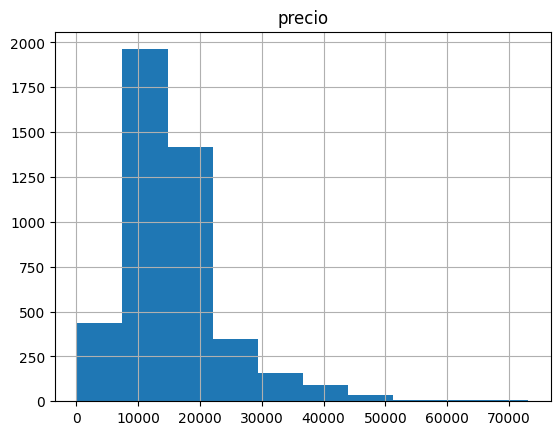

In [100]:
df_bmw_rec.hist("precio")

array([[<Axes: title={'center': 'RAIZ_PRECIO'}>]], dtype=object)

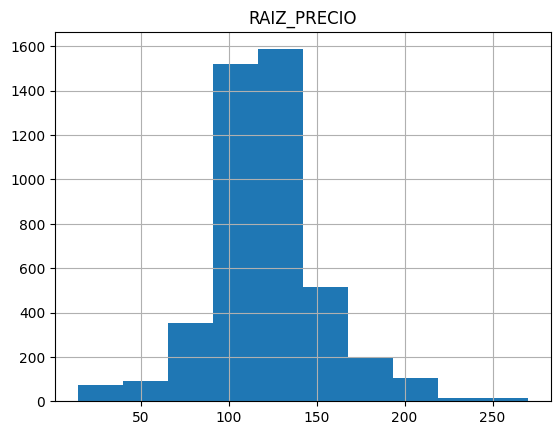

In [101]:
df_bmw_rec.hist("RAIZ_PRECIO")

In [102]:
df_bmw_rec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4465 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4465 non-null   float64
 1   potencia              4465 non-null   float64
 2   tipo_gasolina         4465 non-null   object 
 3   color                 4465 non-null   object 
 4   tipo_coche            4465 non-null   object 
 5   volante_regulable     4465 non-null   int64  
 6   aire_acondicionado    4465 non-null   int64  
 7   camara_trasera        4465 non-null   int64  
 8   elevalunas_electrico  4465 non-null   int64  
 9   bluetooth             4465 non-null   int64  
 10  gps                   4465 non-null   int64  
 11  alerta_lim_velocidad  4465 non-null   int64  
 12  precio                4465 non-null   float64
 13  marca_modelo          4465 non-null   object 
 14  LOG_PRECIO            4465 non-null   float64
 15  RAIZ_PRECIO           4465

# TRANSFORMACIÓN DE DATOS

In [103]:
# Clasificamos las columnas en listas numéricas, booleanas y categóricas.
target= ["PRECIO","RAIZ_PRECIO","LOG_PRECIO"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [104]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw_rec)

In [105]:
lista_categoricas

['tipo_gasolina', 'color', 'tipo_coche', 'marca_modelo']

In [106]:
lista_numericas

['km', 'potencia', 'precio']

In [107]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [108]:
df_bmw_prep=pd.get_dummies(data=df_bmw_rec,columns=lista_categoricas).astype('int64')

In [109]:
df_bmw_prep.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,marca_modelo_BMW M3,marca_modelo_BMW M550,marca_modelo_BMW X1,marca_modelo_BMW X3,marca_modelo_BMW X4,marca_modelo_BMW X5,marca_modelo_BMW X5 M,marca_modelo_BMW X6,marca_modelo_BMW X6 M,marca_modelo_BMW Z4
0,140411,100,1,1,0,1,0,1,1,11300,...,0,0,0,0,0,0,0,0,0,0
2,183297,120,0,0,0,1,0,1,0,10200,...,0,0,0,0,0,0,0,0,0,0
5,152352,225,1,1,0,1,1,1,1,17100,...,0,0,0,0,0,0,0,0,0,0
11,228000,145,1,1,0,1,0,1,1,13300,...,0,0,0,0,0,0,0,0,0,0
12,132025,135,1,1,0,1,1,1,1,21700,...,0,0,0,0,0,0,0,0,0,0


In [110]:
def minmaxTransformacion(variable_transformar):
    minMaxResultado=MinMaxScaler()
    df_bmw_prep[variable_transformar]=minMaxResultado.fit_transform(df_bmw_prep[variable_transformar].values.reshape(-1,1))
    return minMaxResultado

In [111]:
for i in lista_numericas:
  print(i)

km
potencia
precio


In [112]:
for i in lista_numericas:
  globals()[f"minMax_{i}"] = minmaxTransformacion(i)

In [113]:
df_bmw_prep.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,marca_modelo_BMW M3,marca_modelo_BMW M550,marca_modelo_BMW X1,marca_modelo_BMW X3,marca_modelo_BMW X4,marca_modelo_BMW X5,marca_modelo_BMW X5 M,marca_modelo_BMW X6,marca_modelo_BMW X6 M,marca_modelo_BMW Z4
0,0.351978,0.135458,1,1,0,1,0,1,1,0.152263,...,0,0,0,0,0,0,0,0,0,0
2,0.459850,0.215139,0,0,0,1,0,1,0,0.137174,...,0,0,0,0,0,0,0,0,0,0
5,0.382014,0.633466,1,1,0,1,1,1,1,0.231824,...,0,0,0,0,0,0,0,0,0,0
11,0.572291,0.314741,1,1,0,1,0,1,1,0.179698,...,0,0,0,0,0,0,0,0,0,0
12,0.330885,0.274900,1,1,0,1,1,1,1,0.294925,...,0,0,0,0,0,0,0,0,0,0


# ANÁLISIS DE CORRELACIÓN FINAL

In [114]:
corr2 = df_bmw_prep.corr()
corr2.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,LOG_PRECIO,RAIZ_PRECIO,tipo_gasolina_diesel,tipo_gasolina_petrol,color_black,color_blue,color_brown,color_grey,color_silver,color_sin especificar,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin especificar,tipo_coche_suv,marca_modelo_BMW 114,marca_modelo_BMW 116,marca_modelo_BMW 118,marca_modelo_BMW 120,marca_modelo_BMW 125,marca_modelo_BMW 135,marca_modelo_BMW 216 Gran Tourer,marca_modelo_BMW 218,marca_modelo_BMW 218 Active Tourer,marca_modelo_BMW 218 Gran Tourer,marca_modelo_BMW 316,marca_modelo_BMW 318,marca_modelo_BMW 318 Gran Turismo,marca_modelo_BMW 320,marca_modelo_BMW 320 Gran Turismo,marca_modelo_BMW 325,marca_modelo_BMW 325 Gran Turismo,marca_modelo_BMW 328,marca_modelo_BMW 330,marca_modelo_BMW 335,marca_modelo_BMW 418 Gran Coupé,marca_modelo_BMW 420,marca_modelo_BMW 420 Gran Coupé,marca_modelo_BMW 430 Gran Coupé,marca_modelo_BMW 435 Gran Coupé,marca_modelo_BMW 518,marca_modelo_BMW 520,marca_modelo_BMW 520 Gran Turismo,marca_modelo_BMW 523,marca_modelo_BMW 525,marca_modelo_BMW 528,marca_modelo_BMW 530,marca_modelo_BMW 530 Gran Turismo,marca_modelo_BMW 535,marca_modelo_BMW 640,marca_modelo_BMW 640 Gran Coupé,marca_modelo_BMW 730,marca_modelo_BMW 740,marca_modelo_BMW M3,marca_modelo_BMW M550,marca_modelo_BMW X1,marca_modelo_BMW X3,marca_modelo_BMW X4,marca_modelo_BMW X5,marca_modelo_BMW X5 M,marca_modelo_BMW X6,marca_modelo_BMW X6 M,marca_modelo_BMW Z4
km,1.000000,-0.032146,0.070873,0.029923,0.004944,0.056138,-0.027951,0.170083,-0.030700,-0.426015,-0.308717,-0.447052,0.020381,-0.020381,0.038782,-0.020911,-0.025287,0.025281,0.023665,0.002306,-0.071639,0.132941,-0.109399,0.055597,-0.015216,-0.102028,-0.057155,-0.115527,-0.042980,-0.020442,-0.024400,-0.005489,-0.046662,-0.043634,-0.023707,-0.046311,-0.005437,0.055087,0.003805,0.088620,-0.019332,-0.031338,0.007682,-0.010206,-0.014720,-0.012357,-0.024749,-0.057319,-0.090847,-0.024365,-0.055000,0.029385,0.090862,-0.001483,0.006441,0.097258,-0.011964,0.073232,0.044840,0.027464,-0.012911,-0.014981,0.013592,-0.017275,-0.027671,-0.000886,-0.066282,-0.042565,-0.110455,-0.043129,-0.028230,-0.032111,-0.040274,-0.003424
potencia,-0.032146,1.000000,0.322185,0.184856,0.317605,0.343101,0.189559,0.007694,0.431285,0.674865,0.273423,0.639425,-0.073260,0.073260,0.036518,-0.006242,-0.057991,-0.006918,0.025227,-0.005125,-0.006904,-0.042574,-0.199572,0.029292,-0.016066,0.204680,-0.075635,-0.312545,-0.114281,0.010557,0.024148,0.060531,-0.030578,-0.018180,-0.017779,-0.018942,-0.271519,-0.275585,-0.103705,-0.031059,0.015691,0.049369,0.024148,0.046158,0.129620,0.085824,-0.029999,0.006224,0.010182,0.042727,0.088528,-0.085234,-0.013646,-0.003753,0.007820,0.123940,0.054355,0.294681,0.093548,0.267985,0.040782,0.163404,0.113323,0.174782,0.152174,0.211333,-0.125303,0.051319,0.060642,0.376542,0.104808,0.215921,0.110258,-0.007576
volante_regulable,0.070873,0.322185,1.000000,0.286297,0.254473,0.268077,0.113828,0.247558,0.183665,0.285815,0.164690,0.284680,0.031921,-0.031921,0.020650,0.016882,0.038438,0.049776,-0.013847,-0.030928,-0.111227,0.001602,-0.126236,0.056252,-0.030018,0.082177,-0.055623,-0.188430,-0.123331,-0.053430,-0.018449,0.018913,-0.011626,-0.018449,-0.029022,-0.029022,-0.135397,-0.102011,-0.041856,-0.103985,-0.014042,0.015860,-0.018449,-0.010520,0.012784,0.016436,0.027193,0.006448,0.029728,0.023166,0.029914,0.064611,0.178099,0.056431,0.005770,0.097563,-0.004142,0.103714,0.033276,0.061750,0.013372,0.053579,0.071831,0.056842,0.016436,0.028966,-0.101814,0.057809,0.057655,0.146425,0.055234,0.082392,0.024010,0.013372
aire_acondicionado,0.029923,0.184856,0.286297,1.000000,0.140538,0.262392,0.105569,0.357805,0.159003,0.238836,0.268872,0.281957,0.074621,-0.074621,0.038308,-0.001417,0.044230,0.020137,-0.033286,-0.045380,-0.051869,0.070326,-0.085155,0.055866,-0.040618,-0.017876,-0.048850,-0.153180,-0.091832,-0.034759,-0.025839,0.009694,-0.033

In [115]:
nombre_archivo_csv = 'df_bmw_prep.csv'
df_bmw_prep.to_csv(nombre_archivo_csv, index=False)

In [116]:
pd.to_pickle(df_bmw_prep,"C:/Users/mitev/Desktop/Simeon/NUCLIO DIGITAL SCHOOL/Entregables/Primer entregable/final_entregable_Simeon_Mitev_PK")

In [117]:
df_bmw_fin=pd.read_pickle("final_entregable_Simeon_Mitev_PK")

In [118]:
df_bmw_fin.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,marca_modelo_BMW M3,marca_modelo_BMW M550,marca_modelo_BMW X1,marca_modelo_BMW X3,marca_modelo_BMW X4,marca_modelo_BMW X5,marca_modelo_BMW X5 M,marca_modelo_BMW X6,marca_modelo_BMW X6 M,marca_modelo_BMW Z4
0,0.351978,0.135458,1,1,0,1,0,1,1,0.152263,...,0,0,0,0,0,0,0,0,0,0
2,0.459850,0.215139,0,0,0,1,0,1,0,0.137174,...,0,0,0,0,0,0,0,0,0,0
5,0.382014,0.633466,1,1,0,1,1,1,1,0.231824,...,0,0,0,0,0,0,0,0,0,0
11,0.572291,0.314741,1,1,0,1,0,1,1,0.179698,...,0,0,0,0,0,0,0,0,0,0
12,0.330885,0.274900,1,1,0,1,1,1,1,0.294925,...,0,0,0,0,0,0,0,0,0,0


In [119]:
df_bmw_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4465 entries, 0 to 4842
Data columns (total 74 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   km                                  4465 non-null   float64
 1   potencia                            4465 non-null   float64
 2   volante_regulable                   4465 non-null   int64  
 3   aire_acondicionado                  4465 non-null   int64  
 4   camara_trasera                      4465 non-null   int64  
 5   elevalunas_electrico                4465 non-null   int64  
 6   bluetooth                           4465 non-null   int64  
 7   gps                                 4465 non-null   int64  
 8   alerta_lim_velocidad                4465 non-null   int64  
 9   precio                              4465 non-null   float64
 10  LOG_PRECIO                          4465 non-null   int64  
 11  RAIZ_PRECIO                         4465 non-nul